<center><h1>Singh_Vasundhara_HW7</h1></center>

Name: Vasundhara Singh
<br>
Github Username: vasu1406
<br>
USC ID: 7421414643
Late days used-1

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import hamming_loss,accuracy_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')
# df
labels = []
labels.append('Family')
labels.append('Genus')
labels.append('Species')
trainingX, testX, trainingY, testY = train_test_split(df.iloc[:,:-4], df[labels], test_size = 0.3)
# trainingX
# trainingY
# testX
# testY

### (b) Train a classifier for each label

#### (i) Research

**EXACT MATCHING** (EM) - EM measures the proportion of instances for which the predicted and true labels match exactly. In other words, it calculates the accuracy of the classification across all labels. EM is suitable for problems where all labels are equally important, and it penalizes each incorrect label prediction equally.In multi-label multi-output classification, the exact match metric checks if all of the predicted labels exactly match the true labels for a given instance. If all labels match exactly, a score of 1 is assigned; otherwise, a score of 0 is assigned.

**HAMMING LOSS** (HL) Hamming Score/Loss, on the other hand, takes into account the number of labels that are incorrectly predicted for each instance. Hamming Score calculates the proportion of correctly predicted labels, while Hamming Loss calculates the proportion of incorrectly predicted labels. Hamming Loss is suitable for problems where some labels may be more important than others, and it penalizes incorrect label predictions proportionally to their importance. Hamming loss is a metric used in multi-label classification to measure the average number of label mismatches between the predicted and true values. Unlike the strict 1 or 0 policy used in exact match, hamming loss counts the number of differences between each label, which is the same as calculating the hamming distance between two vectors. The average of these label mismatch counts is then computed to obtain the hamming loss value.

**HAMMING SCORE**

Hamming Score is calculated by subtracting Hamming Loss from 1. Hamming Score = 1 - Hamming Loss

In [3]:
# C = 10 ** -2
# gamma =  0.1
grid = {'C':[10**i for i in range(-3,7)],'gamma':[i/10 for i in range(1,21)]}


for c in grid['C']:
    for gamma in grid['gamma']:
        accuracyCGForEachLabel = []
        for label in testY.columns:
            svm = SVC(kernel='rbf', C=c, gamma=gamma)
            svm.fit(trainingX, trainingY[label])
            predictedY = svm.predict(trainingX)
            accuracy = accuracy_score(trainingY[label], predictedY)
            accuracyCGForEachLabel.append(accuracy)
#             print("label = ",label , "C=", c, "gamma=", gamma, "Accuracy=", accuracy)
            
        print("C=", c, "gamma=", gamma, "Accuracy=", np.mean(accuracyCGForEachLabel))
        

C= 0.001 gamma= 0.1 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.2 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.3 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.4 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.5 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.6 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.7 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.8 Accuracy= 0.5575191951284088
C= 0.001 gamma= 0.9 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.0 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.1 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.2 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.3 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.4 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.5 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.6 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.7 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.8 Accuracy= 0.5575191951284088
C= 0.001 gamma= 1.9 Accuracy= 0.5575191951284088
C= 0.001 gamma= 2.0 Accuracy= 0.5575191951284088
C= 0.01 gamma= 0.1 A

#### (ii) Train a SVM for each of the labels

In [4]:
predictedY = {}
print('Gaussian SVM :')
for label in testY.columns:
    svc = SVC(kernel='rbf',decision_function_shape='ovr')

    grid = {'C':[10**i for i in range(-2,7)],'gamma':[i/10 for i in range(1,21)]}

    classifier = GridSearchCV(svc, param_grid = grid, cv = 10, n_jobs = -1)
    classifier.fit(trainingX,trainingY[label])
    predictedY[label] = classifier.predict(testX)


    print('Label = ',label)
    print('Best Score = ',classifier.best_score_)
    print('Best Params = ',classifier.best_params_ )

print('----------------------------------------------------------')
results =[]
for label in testY.columns:
    results.append(hamming_loss(testY[label],predictedY[label]))
print('Hamming Loss =',np.mean(results))

predictedY = pd.DataFrame.from_dict(predictedY)
print('Exact match = ',np.all(predictedY.to_numpy() == testY.to_numpy(),axis = 1).mean())

Gaussian SVM :
Label =  Family
Best Score =  0.9926536021963457
Best Params =  {'C': 10, 'gamma': 1.9}
Label =  Genus
Best Score =  0.9916611442456371
Best Params =  {'C': 10, 'gamma': 1.2}
Label =  Species
Best Score =  0.990667502918994
Best Params =  {'C': 10, 'gamma': 1.3}
----------------------------------------------------------
Hamming Loss = 0.0111162575266327
Exact match =  0.9856415006947661


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [5]:
print('L1 penalised SVM')
predictedYL1 = {}

squaredHingeLoss =  'squared_hinge'
l1penalty = 'l1'
labels = testY.columns

for label in labels:
    grid = [{'linear__C':[10**i for i in range(-2,7)]}]

    linearSVC = LinearSVC(penalty = l1penalty ,loss = squaredHingeLoss,dual = False, max_iter = 1000000 )
    pipe = Pipeline([
    ('scale', StandardScaler()),
    ('linear', linearSVC)])

    classifierL1 = GridSearchCV(pipe,param_grid = grid,cv = 10, n_jobs = -1)
    classifierL1.fit(trainingX,trainingY[label])
    predictedYL1[label] = classifierL1.predict(testX)
    
    print('Label = ',label)
    print('Best Score = ',classifierL1.best_score_)
    print('Best Params = ',classifierL1.best_params_ )
    

print('----------------------------------------------------------')
results =[]
for label in testY.columns:
    results.append(hamming_loss(testY[label],predictedYL1[label]))
print('Hamming Loss = ',np.mean(results))

predictedYL1 = pd.DataFrame.from_dict(predictedYL1)
print('Exact match = ',np.all(predictedYL1.to_numpy() == testY.to_numpy(),axis = 1).mean())

L1 penalised SVM
Label =  Family
Best Score =  0.9348638328757615
Best Params =  {'linear__C': 10}
Label =  Genus
Best Score =  0.9463824197671116
Best Params =  {'linear__C': 10}
Label =  Species
Best Score =  0.9549224494304017
Best Params =  {'linear__C': 100}
----------------------------------------------------------
Hamming Loss =  0.048016056816427365
Exact match =  0.9189439555349699


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [6]:
print('L1 penalised SVM after balancing with SMOTE')


predictedYL1Smote = {}
squaredHingeLoss = 'squared_hinge'
l1penalty = 'l1'

for label in labels:
    
#     grid = [{'linear__C':[10**i for i in range(-3,3)]}]
    grid = [{'linear__C':[10**i for i in range(-2,7)]}]
    linearSVC = LinearSVC(penalty = l1penalty ,loss = squaredHingeLoss,dual = False, max_iter = 1000000 )
    pipe = imbpipe([
    ('smote',SMOTE()),
    ('scale', StandardScaler()),
    ('linear', linearSVC)])

   
    classifierL1Smote = GridSearchCV(pipe, param_grid = grid,cv = 10, n_jobs = -1)
    classifierL1Smote.fit(trainingX,trainingY[label])
    predictedYL1Smote[label] = classifierL1Smote.predict(testX)
    
    print('Label = ',label)
    print('Best Score = ',classifierL1Smote.best_score_)
    print('Best Params = ',classifierL1Smote.best_params_ )
    
print('----------------------------------------------------------')
results =[]
for label in testY.columns:
    results.append(hamming_loss(testY[label],predictedYL1Smote[label]))
print('Hamming Loss = ',np.mean(results))


predictedYL1Smote = pd.DataFrame.from_dict(predictedYL1Smote)
print('Exact match = ',np.all(predictedYL1Smote.to_numpy() == testY.to_numpy(),axis = 1).mean())


L1 penalised SVM after balancing with SMOTE
Label =  Family
Best Score =  0.9211666508883208
Best Params =  {'linear__C': 100}
Label =  Genus
Best Score =  0.9118313925968003
Best Params =  {'linear__C': 1}
Label =  Species
Best Score =  0.9541287986367507
Best Params =  {'linear__C': 10}
----------------------------------------------------------
Hamming Loss =  0.06268334105295661
Exact match =  0.8712366836498379


**Gaussian SVM Results**
Hamming Loss = 0.0111162575266327
Exact match =  0.9856415006947661

**L1-penalised SVMs**
Hamming Loss =  0.048016056816427365
Exact match =  0.9189439555349699

**L1-penalised using SMOTE**
Hamming Loss =  0.06268334105295661
Exact match =  0.8712366836498379


**We can clearly see that Gaussian SVM Results are better than L1-penalised SVMs as well as L1-penalised using Smote in terms of both Hamming Loss and Exact Matching. Also the Hamming Loss and Exact Match for L1 penalised is better without SMOTE**

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

In [7]:
dataForCluster = df.iloc[:,:-1]
features = dataForCluster.iloc[:,:-3]
target = dataForCluster[labels]
# target

### (a) Use k-means clustering
### (b) Determine which family is the majority
### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [8]:
def initialisePredictorLabels(bestK):
#     print(bestK)
    predictorLabels = {}
    for k in range(bestK):
        predictorLabels[k] = {}
        for label in testY.columns:
            predictorLabels[k][label] = {}
    return predictorLabels

In [9]:
def predictLabels(predictors, predictedLabels):

    n = len(predictors)
    for i in range(n):
        k = predictors[i]
        for label in testY.columns:
            trueLabel = df.iloc[i][label]
            predictedLabels[k][label][trueLabel] = predictedLabels[k][label].get(trueLabel,0) + 1
#     print('***************************predictLabels********************')
    return predictedLabels

In [10]:
def populateMajorityLabelsMap(majorityLabels, predictedLabels):
#     majority_labels = {}
#     print("&&&&&&&&&&&&&&&&&populateMajorityLabelsMap&&&&&&&&&&&&&&&&&&&")
#     display(predictedLabels)
    
    for k in predictedLabels:
        majorityLabels[k] = {}
        for label in labels:

            majorityLabels[k][label] = max(predictedLabels[k][label], key=lambda item: predictedLabels[k][label][item])

#     display(majorityLabels)
    return majorityLabels

In [11]:
##CALCULATE HAMMING LOSS AND PRINT
def calculateHammingLoss(majorityLabels,predictors):
    hammingLoss = []
    hammingDistance = []
    n = len(df)
    for i in range(n):
        parameter1 = df[testY.columns].iloc[i]
        parameter2 = majorityLabels[predictors[i]]

        labels = parameter2.keys()
        results = [hamming_loss([parameter1[label]], [parameter2[label]]) for label in labels]

        hammingLoss.append(np.mean(results))
        
    
        
    for i in range(len(df)):
        parameter1 = df[testY.columns].iloc[i]
        parameter2 = majorityLabels[predictors[i]]

#         NEW CODE
        labels = parameter2.keys()
        results = [hamming_loss([parameter1[label]], [parameter2[label]]) for label in labels]
        hammingDistance.append(np.sum(results))

    meanHammingLoss = np.mean(hammingLoss)
    meanHammingDistance = np.mean(hammingDistance)
    
    return meanHammingLoss,meanHammingDistance


In [12]:
monteHammingDistanceArray = []
for i in range(0,50):
    print('Iteration No.',i,":")
#     New Code
    rangeForClusters = range(2,51)
    bestScore = 0
    bestK = 1
    for cluster in rangeForClusters:
        clusterMaker = KMeans(n_clusters = cluster, init='random')
        predictors = clusterMaker.fit_predict(features)
        centers = clusterMaker.cluster_centers_
        score = silhouette_score(features, predictors)
        if score > bestScore:
            bestScore = score
            bestK = cluster

    print('Best K found = ',bestK,' having Silhouette Score = ',bestScore)
    
    clusterer = KMeans(n_clusters = bestK)
    predictors = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_
   

    predictedLabels = {}
    predictedLabels = initialisePredictorLabels(bestK)
    predictedLabels = predictLabels(predictors, predictedLabels)
    

    majorityLabels = dict()
    majorityLabels = populateMajorityLabelsMap(majorityLabels, predictedLabels)
    print("MAJORITY LABELS : ")
    display(majorityLabels)

    meanHammingLoss, meanHammingDistance = calculateHammingLoss(majorityLabels,predictors)
    print('Avg Hamming Score',1 - meanHammingLoss)
    print('Avg Hamming Loss = ',meanHammingLoss)
    print('Avg hamming Distance=',meanHammingDistance)

    monteHammingDistanceArray.append(meanHammingDistance)
                     

Iteration No. 0 :
Best K found =  4  having Silhouette Score =  0.37863353074850936
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 1 :
Best K found =  4  having Silhouette Score =  0.37867825251598397
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 2 :
Best K found =  4  having Silhouette Score =  0.38523395202479643
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7778549918925179
Avg Hamming Loss =  0.22214500810748203
Avg hamming Distance= 0.6664350243224462
Iteration No. 3 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 4 :
Best K found =  4  having Silhouette Score =  0.37863353074850936
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 5 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 6 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 7 :
Best K found =  4  having Silhouette Score =  0.37866647707550904
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 8 :
Best K found =  4  having Silhouette Score =  0.3788646212055977
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775306926106093
Avg Hamming Loss =  0.22246930738939075
Avg hamming Distance= 0.6674079221681724
Iteration No. 9 :
Best K found =  4  having Silhouette Score =  0.37867825251598397
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 10 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7780866342367385
Avg Hamming Loss =  0.2219133657632615
Avg hamming Distance= 0.6657400972897846
Iteration No. 11 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 12 :
Best K found =  4  having Silhouette Score =  0.38523395202479643
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 13 :
Best K found =  4  having Silhouette Score =  0.37863353074850936
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 14 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 15 :
Best K found =  4  having Silhouette Score =  0.37867825251598397
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 16 :
Best K found =  4  having Silhouette Score =  0.3788646212055977
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 17 :
Best K found =  4  having Silhouette Score =  0.38404734963425025
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7777160064859856
Avg Hamming Loss =  0.22228399351401434
Avg hamming Distance= 0.6668519805420431
Iteration No. 18 :
Best K found =  4  having Silhouette Score =  0.37866647707550904
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 19 :
Best K found =  4  having Silhouette Score =  0.37888514720477384
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7779476488302062
Avg Hamming Loss =  0.22205235116979383
Avg hamming Distance= 0.6661570535093815
Iteration No. 20 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 21 :
Best K found =  4  having Silhouette Score =  0.374709713992453
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 22 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 23 :
Best K found =  4  having Silhouette Score =  0.37866647707550904
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 24 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 25 :
Best K found =  4  having Silhouette Score =  0.38523395202479643
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 26 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 27 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraAndre'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7662728746814917
Avg Hamming Loss =  0.2337271253185082
Avg hamming Distance= 0.7011813759555247
Iteration No. 28 :
Best K found =  4  having Silhouette Score =  0.3788646212055977
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 29 :
Best K found =  4  having Silhouette Score =  0.3788646212055977
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 30 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 31 :
Best K found =  4  having Silhouette Score =  0.38523395202479643
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 32 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 33 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 34 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775306926106093
Avg Hamming Loss =  0.22246930738939075
Avg hamming Distance= 0.6674079221681724
Iteration No. 35 :
Best K found =  4  having Silhouette Score =  0.37866647707550904
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 36 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 37 :
Best K found =  4  having Silhouette Score =  0.37863353074850936
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 38 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 39 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 40 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 41 :
Best K found =  4  having Silhouette Score =  0.3788646212055977
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 42 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 43 :
Best K found =  4  having Silhouette Score =  0.3846621564503622
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 44 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775306926106093
Avg Hamming Loss =  0.22246930738939075
Avg hamming Distance= 0.6674079221681724
Iteration No. 45 :
Best K found =  4  having Silhouette Score =  0.37867825251598397
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraAndre'}}

Avg Hamming Score 0.754876071345842
Avg Hamming Loss =  0.24512392865415797
Avg hamming Distance= 0.735371785962474
Iteration No. 46 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 2: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 3: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 47 :
Best K found =  4  having Silhouette Score =  0.3787509343305295
MAJORITY LABELS : 


{0: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 1: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 48 :
Best K found =  4  having Silhouette Score =  0.37864555133782885
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'},
 2: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 3: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164
Iteration No. 49 :
Best K found =  4  having Silhouette Score =  0.37865378490650226
MAJORITY LABELS : 


{0: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCordobae'},
 1: {'Family': 'Dendrobatidae',
  'Genus': 'Ameerega',
  'Species': 'Ameeregatrivittata'},
 2: {'Family': 'Hylidae',
  'Genus': 'Hypsiboas',
  'Species': 'HypsiboasCinerascens'},
 3: {'Family': 'Leptodactylidae',
  'Genus': 'Adenomera',
  'Species': 'AdenomeraHylaedactylus'}}

Avg Hamming Score 0.7775770210794534
Avg Hamming Loss =  0.22242297892054666
Avg hamming Distance= 0.66726893676164


In [14]:
avgHD = np.mean(monteHammingDistanceArray)
stdHD = np.std(monteHammingDistanceArray)
print('Average Hamming Distance after 50 runs = ',avgHD) 
print('Standard deviation of hamming distance of 50 runs =',stdHD)

Average Hamming Distance after 50 runs =  0.669239749826268
Standard deviation of hamming distance of 50 runs = 0.010581443419815031


## 3. ISLR 12.6.2

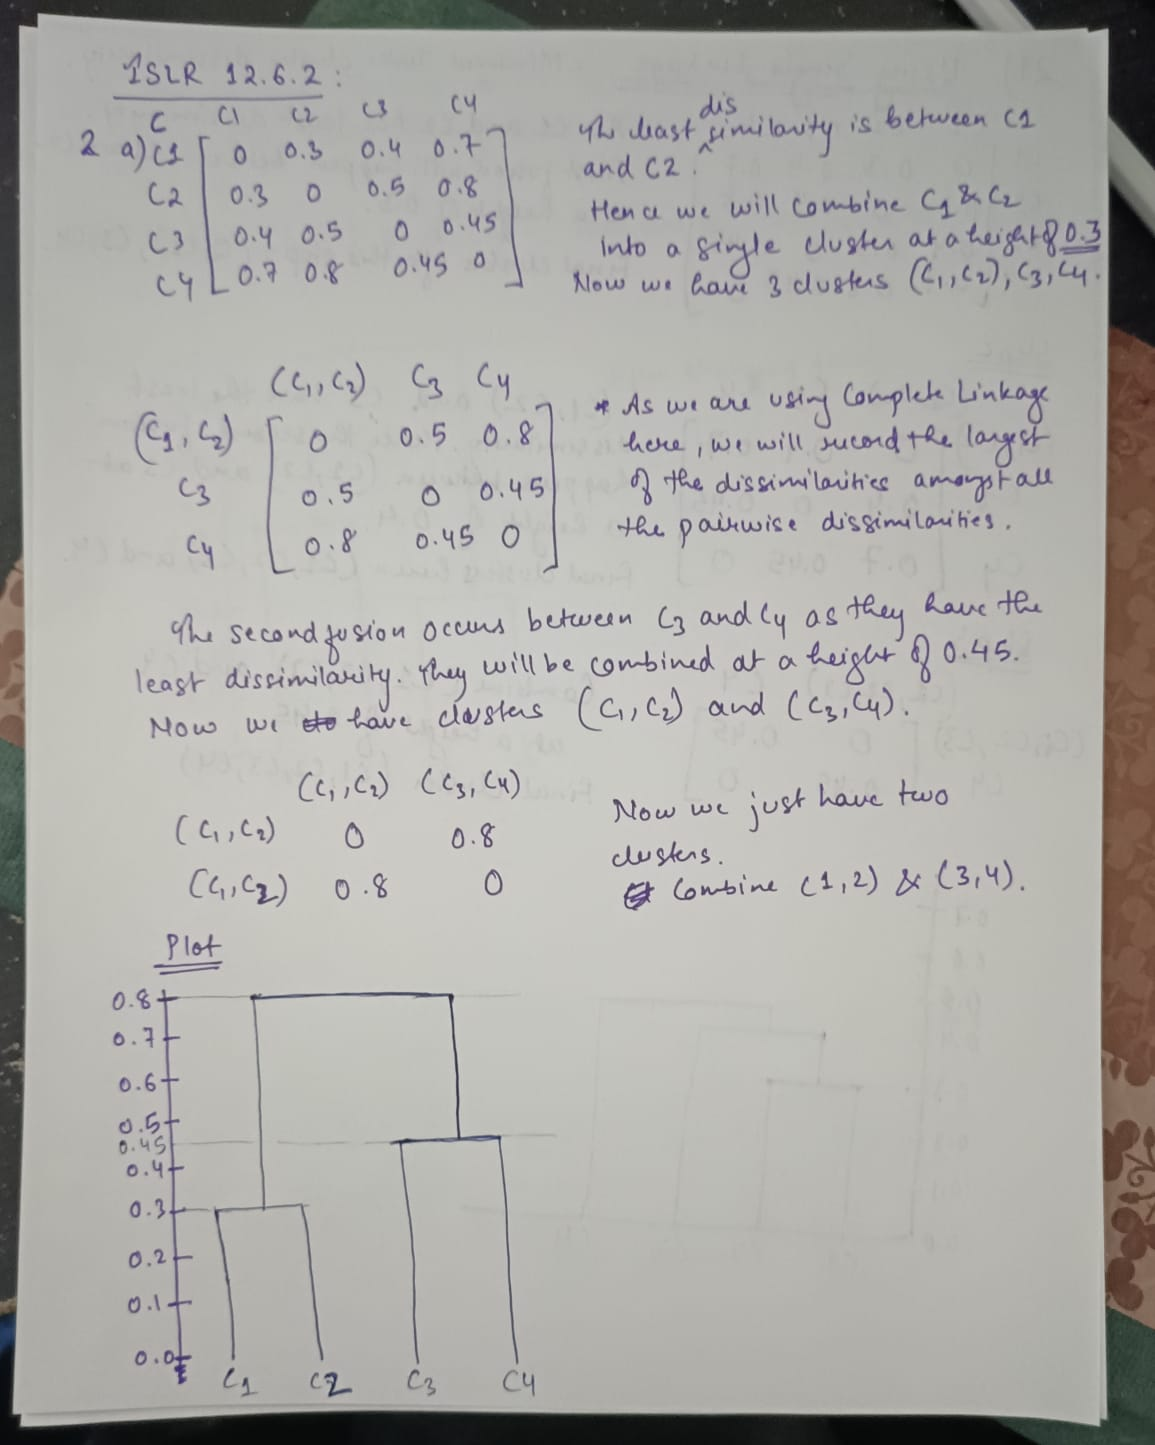

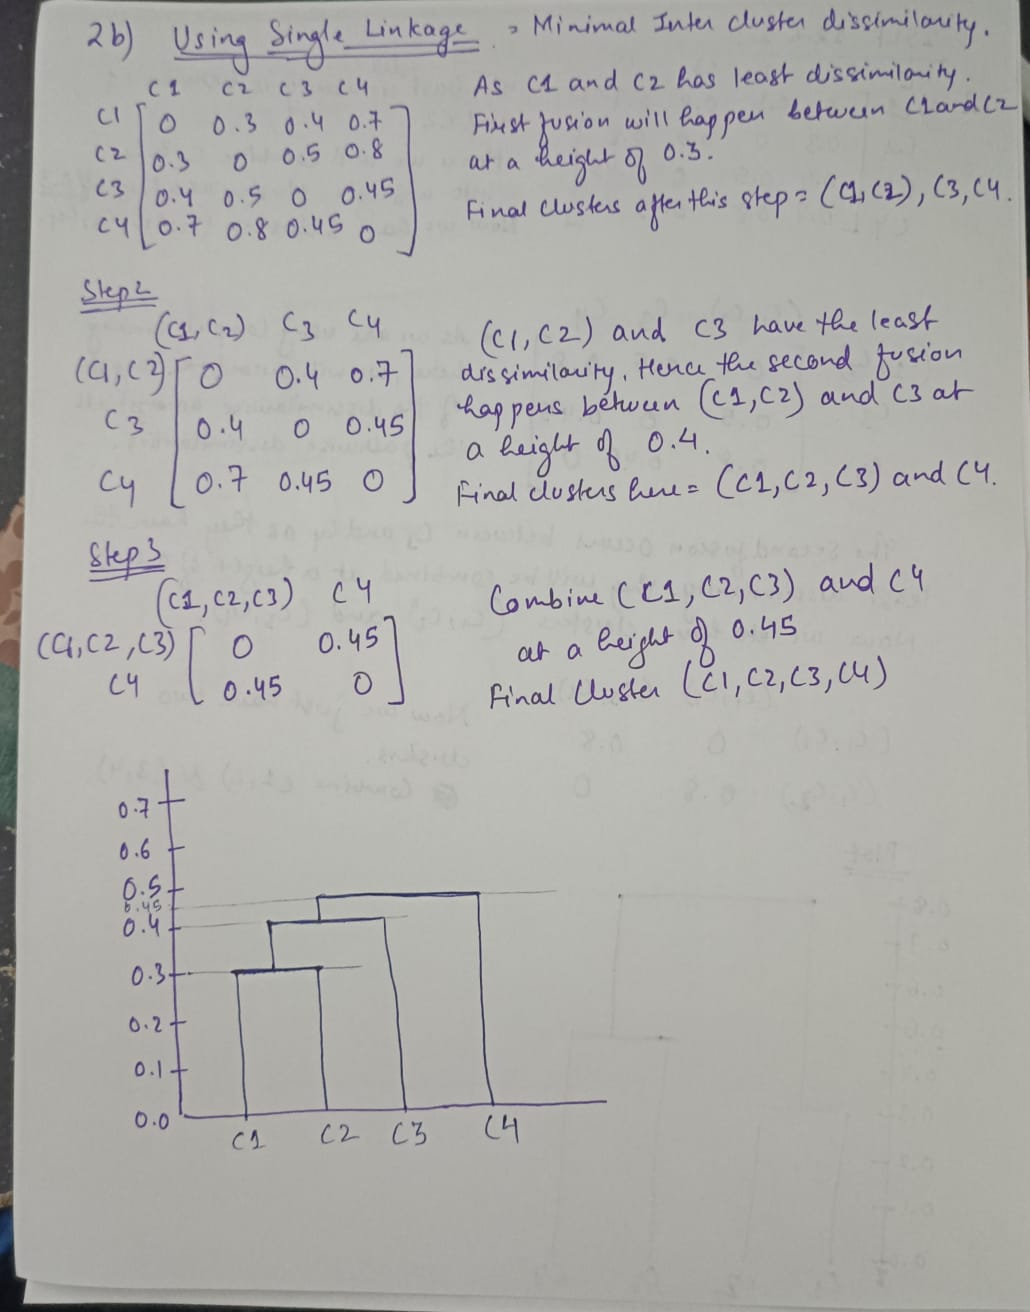

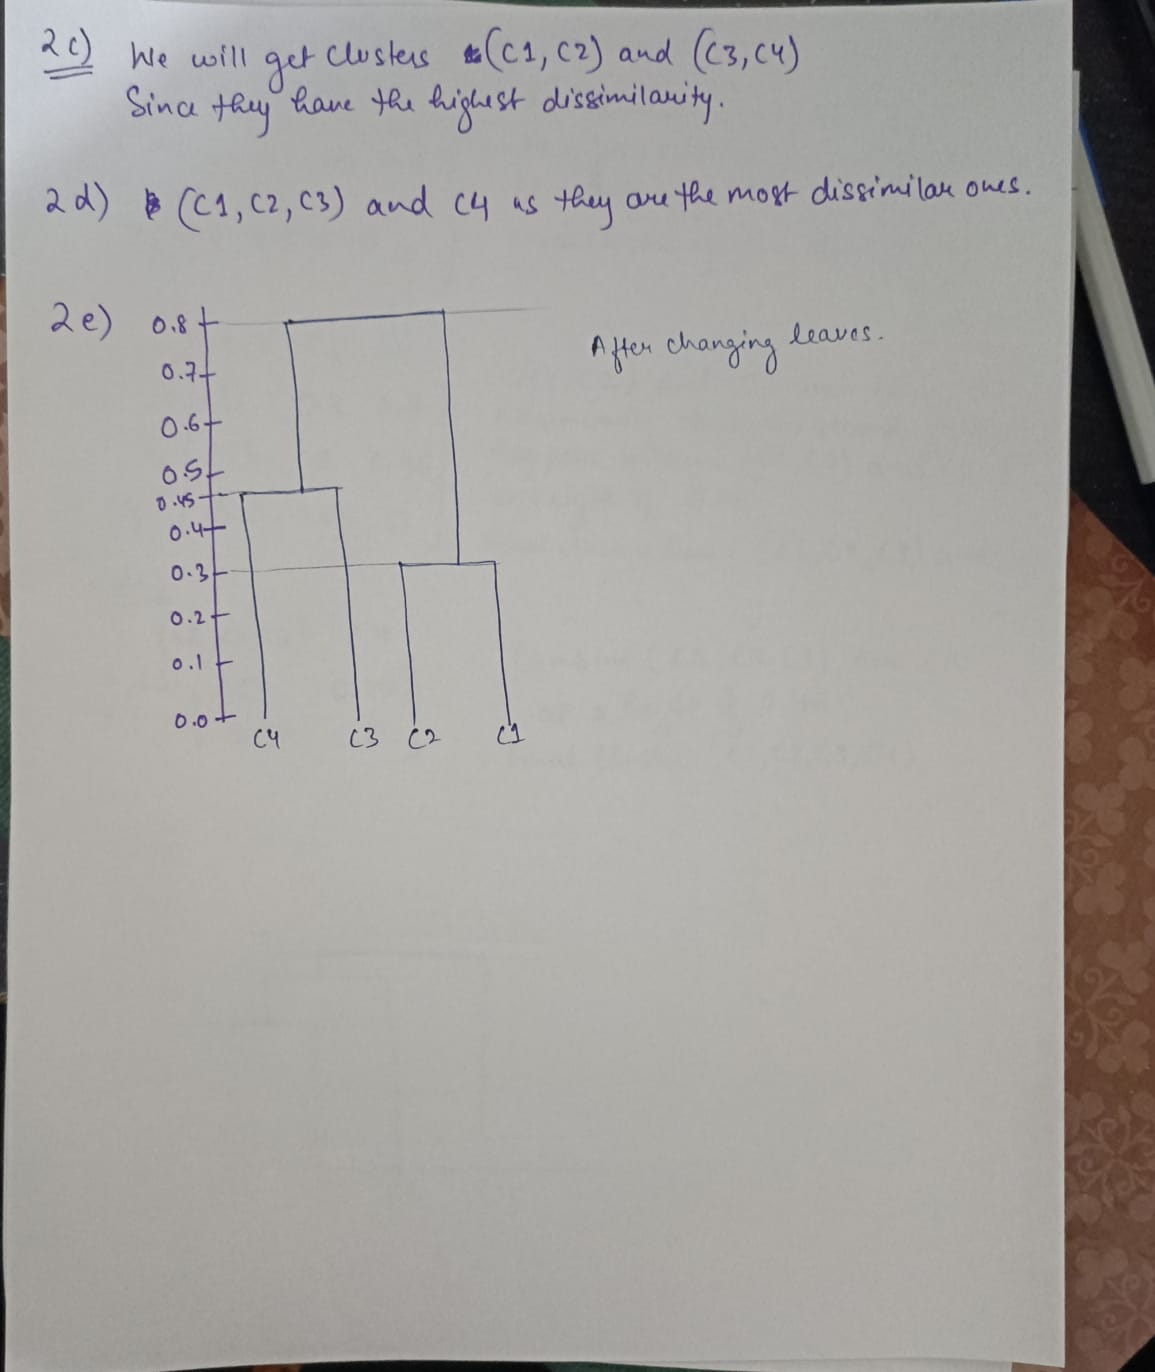